# NAC2 - Classificação

## Instruções

Leia atentamente as instruções.

1) O trabalho deve ser realizado em grupo. Pode ser o mesmo grupo do challenge. Não deve ter nenhum grupo maior do que o maior grupo de challenge (i.e. 5 ou 6 pessoas por grupo).

2) Você deverá submenter este arquivo Jupyter Notebook com as respostas nos campos indicados. Caso ache necessário, crie células markdown para comentar suas respostas e apontamentos.

3) Apenas um aluno submeterá no Teams. Mude o nome do arquivo para as iniciais do seu nome completo seguido do seu RM. Exemplo: HFS84100-NAC1

4) A entrega deverá ser feita até às <font color='red'>**23h59** </font> de  <font color='red'>**27/maio/2021** </font> em tarefa a ser aberta no Microsoft Teams.

5) A pontuação das questões estão marcadas em cada uma.

6) Todos os datasets usados aqui são públicos e podem ser consultados em https://www.kaggle.com ou em https://www.openml.org/

7) Dúvidas, pergunte para o professor.

### Insira nome e RM dos membros do grupo aqui
João Batista Dionisio Neto
RM: 83862

Patrick Gabriel Lopes Ferreira
RM: 82121

Frederico Costa do Nascimento Dezorzi
RM: 82507

Davi Alves Fogaroli
RM: 83439

Luccas Guilherme Cordeiro
RM: 83515

Kelvin Bernardino Silva Santos
RM: 83546




### Bibliotecas Utilizadas
Se achar necessário, importe outras bibliotecas e comente na frente por que decidiu usá-las

In [1]:
# Tratamento dos dados
import numpy as np
import pandas as pd
from collections import Counter

# Carregamento de dados do OpenML
from sklearn.datasets import fetch_openml

# GEral Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_validate, train_test_split, StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix
from sklearn.metrics import f1_score,accuracy_score, precision_score, recall_score, classification_report
from sklearn.metrics import mean_squared_error, make_scorer, cohen_kappa_score, log_loss
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler  # Escalonamento

# Classificadores
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis

# Plot dos gráficos
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import colors
import seaborn as sns

## Questão 1 (Coluna Vertebral) - Análise Exploratória (1,5 pts)

Você recebeu um dataset sobre problemas ortopédicos da coluna vertebal. Faça uma análise exploratória relatando distribuições, correlações e valores médios dos atributos. Discuta se encontrar algo interessante (use uma célula markdown para isso). Não esqueça de fazer um histograma das classes

Os dados estão disponíveis em https://www.openml.org/d/1524

In [2]:
# Carregando dados publicos
dado = fetch_openml(data_id=1524)
df = pd.DataFrame(dado.data,columns=dado.feature_names) # Observe que em dados.data você tem acesso aos atributos
Counter(dado.target)

Counter({'1': 210, '2': 100})

In [3]:
# Checando os targets (classes)
dado.target

array(['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1

Analisando os targets e lendo o openml do problema descobrimos que 2 representa as pessoas que não tem problema de coluna e 1 representa pessoas que estão com Spondylolisthesis ou com hernia de disco

# Descobrimos tambem que:
    v1 =incidência pélvica
    v2 =inclinação pélvica
    v3 =ângulo da lordose lombar
    v4 =inclinação sacral 
    v5 =rádio pélvico 
    v6 =grau de espondilolistese

In [4]:
## Insira seus códigos aqui
dado = pd.DataFrame(data=dado.data, columns = dado.feature_names)
dado.head()

,V1,V2,V3,V4,V5,V6
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985136,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501


In [5]:
dado.describe()

,V1,V2,V3,V4,V5,V6
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767933
75%,72.877696,22.120395,63.000000,52.695889,125.467675,41.287352
max,129.834041,49.431864,125.742386,121.429566,163.071041,418.543082


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B03E492FD0>,
      dtype=object)

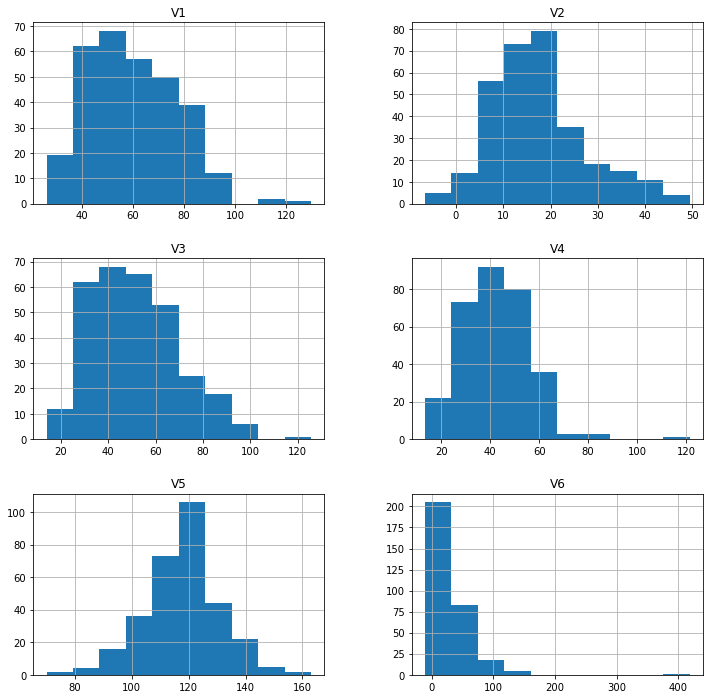

In [6]:
dado.hist(figsize=(12,12))

O histograma dos dados nos ajuda a entender melhor a distribuição dos dados

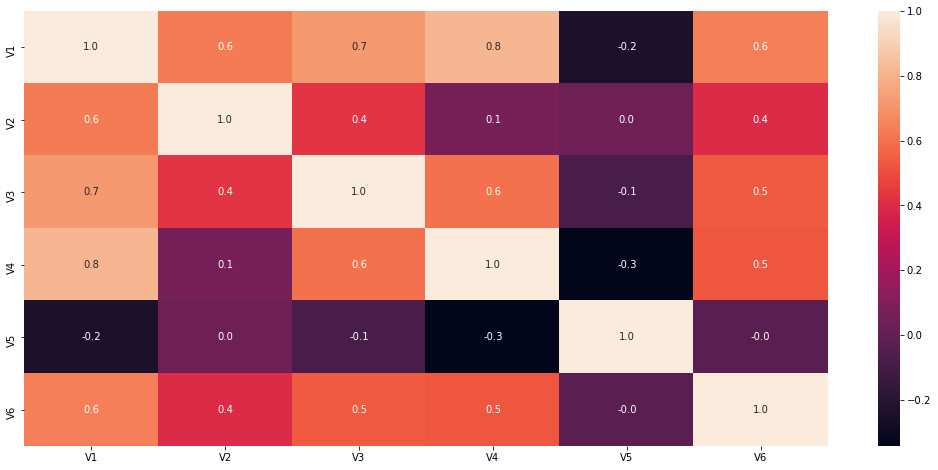

In [7]:
plt.figure(figsize=(18,8))
sns.heatmap(dado.corr(method = 'pearson'), annot=True, fmt=".1f");

No "head map", com o metodo de person, podemos observar a coorelação de todos os V, um com os outros, e até mesmo com si mesmo.
O mais interesando aqui é o V5, que possui uma relação decrescente em sua maioria, apenas em sua relação com om V2 e V6 que ele estabelece uma relação "o.o", indicando que é uma reta sem inclinação.
Como podemois observar no grafico abaixo:

<ipython-input-8-08ae05101de6>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,1,1)


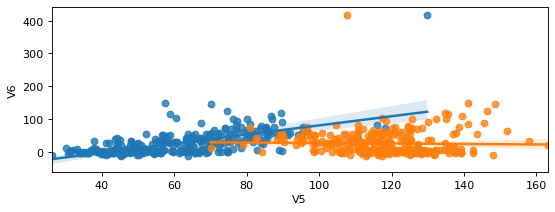

In [8]:
plt.figure(figsize=(8, 6), dpi=80)
plt.subplot(2,1,1)
sns.regplot(data = dado, x = 'V1', y = 'V6')
plt.subplot(2,1,1)
sns.regplot(data = dado, x = 'V5', y = 'V6')

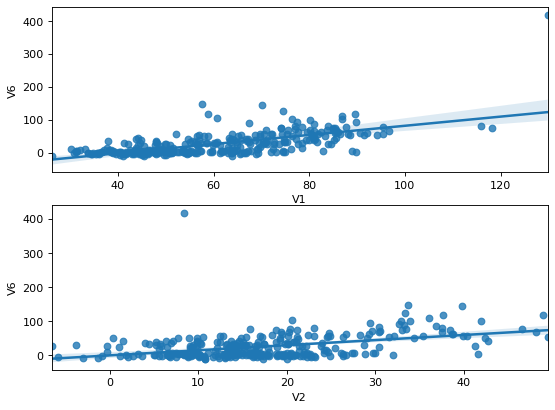

In [9]:
plt.figure(figsize=(8, 6), dpi=80)
plt.subplot(2,1,1)
sns.regplot(data = dado, x = 'V1', y = 'V6')
plt.subplot(2,1,2)
sns.regplot(data = dado, x = 'V2', y = 'V6')

Nos graficos acima: Tomamos o V6 como comparador, por conta de sua distribuição, que melhor representa as premissas dos 210 paciente anormais e 100 pacientes normais. E por ele possuir uma valor maximo muito descrepante, com relação a todos os outros V, oque é demaziado enteresante.

Levando isso em conta, observamos que o valor maximo de V6 interage de uma forma especifica com o V1 e V4, e de outra forma com o V2, V3 e V5.

Vemos que o valor maximo de V6 tambem é estremamente alto em V1 e V4, oque pode indicar que aquele paciente (ou pequeno grupo), possui as 3 enfermidades.
Ja com relação ao V2, V3 e V5, o Max V6, tem valor medio nestes três outros V, como podemos observar nos graficos abaixo, oque pode nos indicar que aquele paciente (ou pequeno grupo),não possui as enfermidades de V2, V3 e V5.

<ipython-input-10-8fd6ecc91623>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,1,1)
<ipython-input-10-8fd6ecc91623>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,1,1)


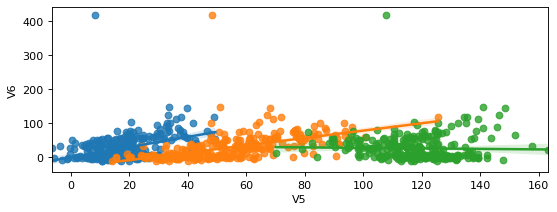

In [10]:
plt.figure(figsize=(8, 6), dpi=80)
plt.subplot(2,1,1)
sns.regplot(data = dado, x = 'V2', y = 'V6')
plt.subplot(2,1,1)
sns.regplot(data = dado, x = 'V3', y = 'V6')
plt.subplot(2,1,1)
sns.regplot(data = dado, x = 'V5', y = 'V6')

<ipython-input-11-7db00ee2f229>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,1,1)
<ipython-input-11-7db00ee2f229>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,1,1)
<ipython-input-11-7db00ee2f229>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and retur

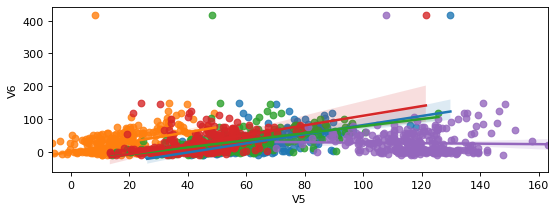

In [11]:
plt.figure(figsize=(8, 6), dpi=80)
plt.subplot(2,1,1)
sns.regplot(data = dado, x = 'V1', y = 'V6')
plt.subplot(2,1,1)
sns.regplot(data = dado, x = 'V2', y = 'V6')
plt.subplot(2,1,1)
sns.regplot(data = dado, x = 'V3', y = 'V6')
plt.subplot(2,1,1)
sns.regplot(data = dado, x = 'V4', y = 'V6')
plt.subplot(2,1,1)
sns.regplot(data = dado, x = 'V5', y = 'V6')

Este grafico que esboça a relação de todos os V juntos, nos permitiu observar que não precisamos fazer escalonamente quando vamos treinar o modelo, pois a unica descrepancia absurda é do Max V6.

## Questão 2 (Coluna Vertebral) - Modelo de Classificação (3,5 pts)

Teste os seguintes modelos de classificação e diga qual é mais adequado para realizar a tarefa. Você é capaz de ver uma aplicação para um classificador desse tipo?

**Dica**: olhe na documentação dos classificadores para saber se é necessário ou não setar um hiperparâmetro.

In [12]:
# 1. Criando os objetos que instanciam os classificadores

# Atenção, alguns classificadores necessitam de hiperparametros para roda. Não esqueça de colocar
# Podemos criar o modelo com ou sem balanceamento de classes (o hiperparametro class_weight)
# Esse parâmetro é útil quando o número de exemplos entre as classes não está balanceado 
# Exemplo: LogisticRegression(class_weight = 'balanced')
dado = fetch_openml(data_id=1524)
df = pd.DataFrame(dado.data,columns=dado.feature_names) # Observe que em dados.data você tem acesso aos atributos
Counter(dado.target)

classificadores = {
    'GNB' : GaussianNB(),
    'LDA' : LinearDiscriminantAnalysis(),
    'QDA' : QuadraticDiscriminantAnalysis(),
    'KNN' : KNeighborsClassifier(n_neighbors=5),
    'RLOG' : LogisticRegression(class_weight = 'balanced')
  }

In [13]:
# 2. Dividindo os dados no conjunto de teste e treinamento
x_train, x_test, y_train, y_test = train_test_split(dado.data,
                                                    dado.target,
                                                    test_size=0.3, random_state=42)

# 3. As vezes é necessário escalonar os dados, quando isso é necessário?
#Usamos escalonador de dados quando temos uma diferença grande na dimenção dos dados 
#exemplo(qunado comparamos uma coluna que tem a media 0,1 com outra que tem a media 1000)


In [14]:
# 4. Treinar o modelo

model_GNB = classificadores['GNB'].fit(x_train, y_train)
# model2 ....
model_LDA = classificadores['LDA'].fit(x_train, y_train)
model_QDA = classificadores['QDA'].fit(x_train, y_train)
model_KNN = classificadores['KNN'].fit(x_train, y_train)
model_RLOG = classificadores['RLOG'].fit(x_train, y_train)

y_pred_GNB = model_GNB.predict(x_test)
y_pred_LDA = model_LDA.predict(x_test)
y_pred_QDA = model_QDA.predict(x_test)
y_pred_KNN = model_KNN.predict(x_test)
y_pred_RLOG = model_RLOG.predict(x_test)

D:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


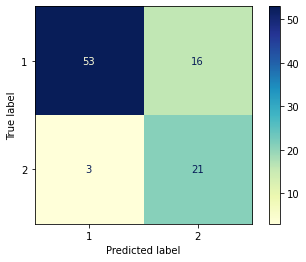

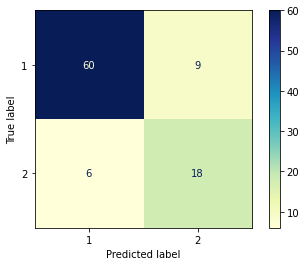

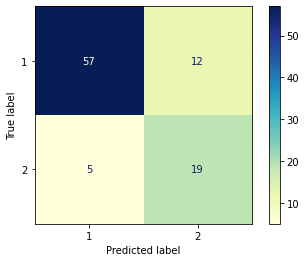

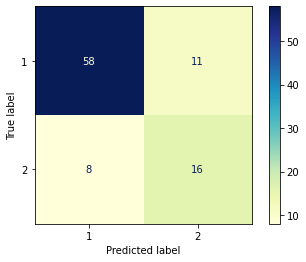

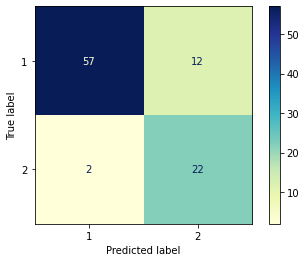

In [15]:
# 5. Plote as matrizes de confusão de cada modelo. Discuta.
plot_confusion_matrix(model_GNB, x_test, y_test, cmap='YlGnBu', values_format='.0f');
plot_confusion_matrix(model_LDA, x_test, y_test, cmap='YlGnBu', values_format='.0f');
plot_confusion_matrix(model_QDA, x_test, y_test, cmap='YlGnBu', values_format='.0f');
plot_confusion_matrix(model_KNN, x_test, y_test, cmap='YlGnBu', values_format='.0f');
plot_confusion_matrix(model_RLOG, x_test, y_test, cmap='YlGnBu', values_format='.0f');


Observando a nossa matriz de confução vemos que o classificador de regressão logistica tem menor taxa de erro do que os outos tendo uma acuracia maior e precisão tambem ,mas tendendo ao erro de dizer que pessoas doentes estão saudaveis mas com baixa taxa de erro

In [16]:
# 6. Compare os valores de acurácia, recall, precisão e f1 score para todos os classificadores testados
print('Acurácia:',round(accuracy_score(y_test, y_pred_GNB),4))
print(classification_report(y_test, y_pred_GNB))

print('Acurácia:',round(accuracy_score(y_test, y_pred_LDA),4))
print(classification_report(y_test, y_pred_LDA))

print('Acurácia:',round(accuracy_score(y_test, y_pred_QDA),4))
print(classification_report(y_test, y_pred_QDA))

print('Acurácia:',round(accuracy_score(y_test, y_pred_KNN),4))
print(classification_report(y_test, y_pred_KNN))

print('Acurácia:',round(accuracy_score(y_test, y_pred_RLOG),4))
print(classification_report(y_test, y_pred_RLOG))

Acurácia: 0.7957
              precision    recall  f1-score   support

           1       0.95      0.77      0.85        69
           2       0.57      0.88      0.69        24

    accuracy                           0.80        93
   macro avg       0.76      0.82      0.77        93
weighted avg       0.85      0.80      0.81        93

Acurácia: 0.8387
              precision    recall  f1-score   support

           1       0.91      0.87      0.89        69
           2       0.67      0.75      0.71        24

    accuracy                           0.84        93
   macro avg       0.79      0.81      0.80        93
weighted avg       0.85      0.84      0.84        93

Acurácia: 0.8172
              precision    recall  f1-score   support

           1       0.92      0.83      0.87        69
           2       0.61      0.79      0.69        24

    accuracy                           0.82        93
   macro avg       0.77      0.81      0.78        93
weighted avg       0.84

Ver nosso report de classificação nos confirma que a maior acuracia e precisão é do modelo de classificação de regreção logistica

## Questão 3 (Corrida) - Análise Exploratória (1,5 pts)

Você recebeu dados de corrida de dispositivos iOS. Descubra padrões.

Mais informações sobre os dados podem ser obtidas em https://www.openml.org/d/40922

In [17]:
# Carregando dados publicos
corrida = fetch_openml(data_id=40922)
df = pd.DataFrame(corrida.data,columns=corrida.feature_names) # Observe que em dados.data você tem acesso aos atributos
Counter(corrida.target)

Counter({'0': 44223, '1': 44365})

In [18]:
corrida = pd.DataFrame(data=corrida.data, columns = corrida.feature_names)
corrida.head()

,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-29.2960
1,0.6722,-11.2330,-0.2344,-0.1757,0.0208,0.1269
2,0.4399,-14.8170,0.0722,-0.9105,0.1063,-24.3670
3,0.3031,-0.8125,0.0888,0.1199,-0.4099,-29.3360
4,0.4814,-0.9312,0.0359,0.0527,0.4379,24.9220


In [19]:
corrida.describe()

,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
count,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000
mean,-0.735403,-3.425864,-1.585894,0.005690,0.285645,0.281254
std,9.419857,5.633842,4.631486,11.779596,11.209552,18.821379
min,-53.505000,-32.990000,-37.538000,-44.306000,-74.647000,-94.800000
25%,-0.381800,-10.335000,-0.376000,-0.920700,-0.644825,-13.451250
50%,-0.059500,-0.759100,-0.221000,0.018700,0.039300,0.006900
75%,0.355500,-0.241775,-0.085900,0.888800,0.733700,13.982000
max,56.033000,26.680000,16.403000,48.742000,84.980000,112.662000


A media de todas as acelerações esta padronizada se mantendo com metade (ou mais da metade) delas abaixo de 0. Assim como os valores dos giroscopios, que mantem esse mesmo padrão.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B04098E100>,
      dtype=object)

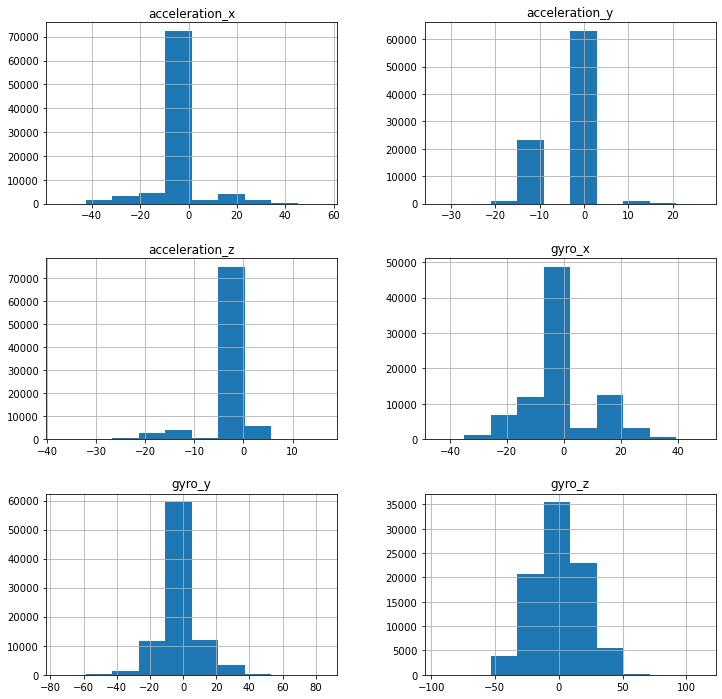

In [20]:
corrida.hist(figsize=(12,12))

No grafico abaixo podemos observar mais claramente que os dados dos giroscopios tem um influencia praticamente ondignficante com relação aos dados de aceleração, isso se estabelece por um padrão 7/9 relações existente entre esses dados.

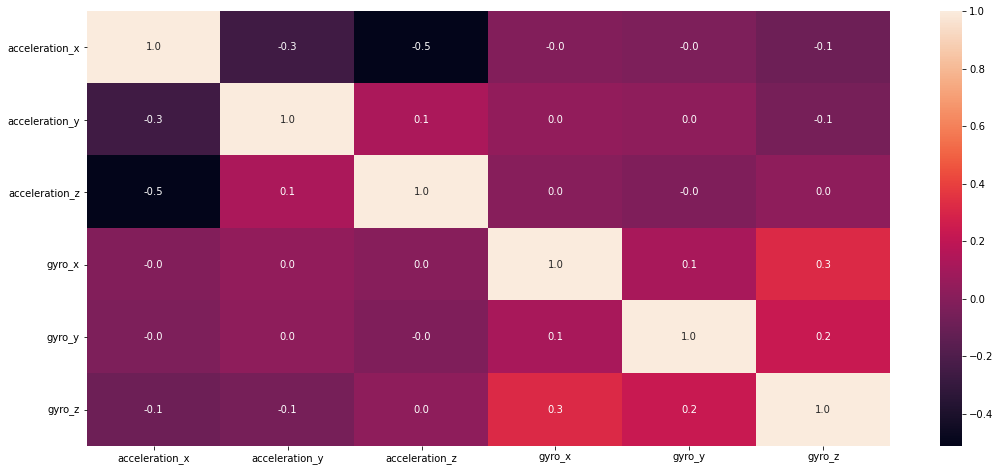

In [21]:
plt.figure(figsize=(18,8))
sns.heatmap(corrida.corr(method = 'pearson'), annot=True, fmt=".1f");

Um padrão encontrado (representado nos graficos abaixo), é este espaço vazio nos graficos, com uma coluna de dados no meio, representando o desaceleramento final de uma corrida/caminhada ou aceleração inicial, essa lacuna existe, pois os dados são captados a cada segundo, e o processo de parar e começar a se mover é mais rapido que o envio de dados a cada 10 segundos, e que a frequencia de captura de dados de +ou- 5,4s. (fonte:  https://www.openml.org/d/40922)

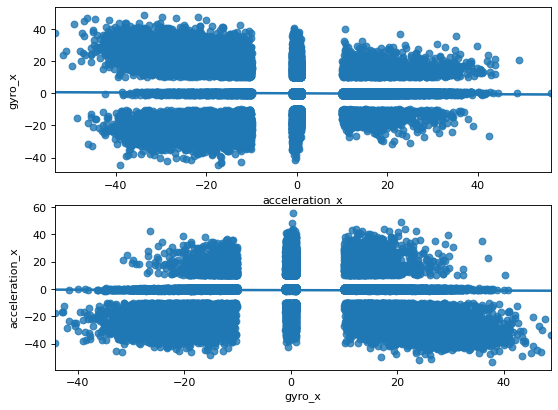

In [22]:
plt.figure(figsize=(8, 6), dpi=80)
plt.subplot(2,1,1)
sns.regplot(data = corrida, x = "acceleration_x", y = 'gyro_x')
plt.subplot(2,1,2)
sns.regplot(data = corrida, x = 'gyro_x', y = 'acceleration_x')

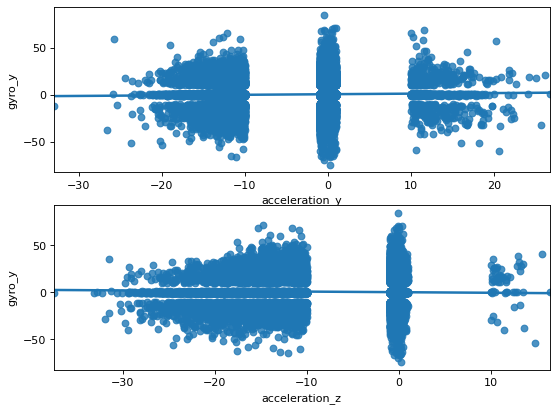

In [23]:
plt.figure(figsize=(8, 6), dpi=80)
plt.subplot(2,1,1)
sns.regplot(data = corrida, x = 'acceleration_y', y = 'gyro_y')
plt.subplot(2,1,2)
sns.regplot(data = corrida, x = 'acceleration_z', y = 'gyro_y')

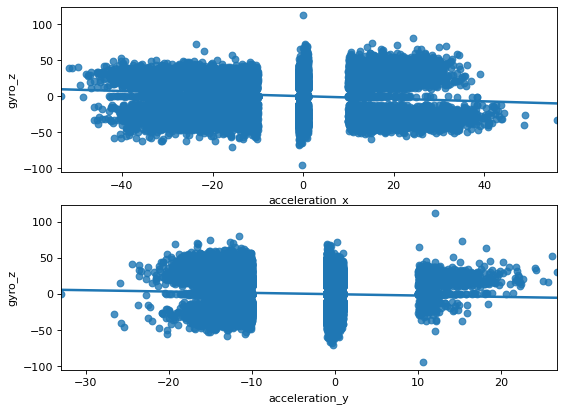

In [24]:
plt.figure(figsize=(8, 6), dpi=80)
plt.subplot(2,1,1)
sns.regplot(data = corrida, x = 'acceleration_x', y = 'gyro_z')
plt.subplot(2,1,2)
sns.regplot(data = corrida, x = 'acceleration_y', y = 'gyro_z')

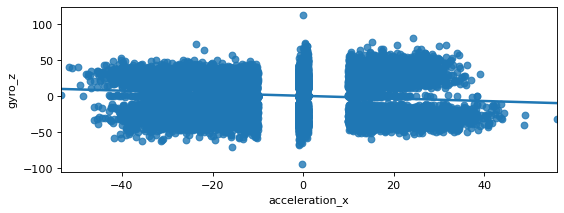

In [25]:
plt.figure(figsize=(8, 6), dpi=80)
plt.subplot(2,1,1)
sns.regplot(data = corrida, x = 'acceleration_x', y = 'gyro_z')

## Questão 4 (Corrida) - Modelo de Classificação (3,5 pts)

Agora crie modelos de classificação para os targets. Qual classificador é melhor? Você é capaz de ver uma aplicação para um classificador desse tipo?

In [26]:
# 1. Criando os objetos que instanciam os classificadores

Classificadores = {
    'GNB' : GaussianNB(),
    'LDA' : LinearDiscriminantAnalysis(),
    'QDA' : QuadraticDiscriminantAnalysis(),
    'KNN' : KNeighborsClassifier(),
    'RLOG' : LogisticRegression()
  }

In [27]:
corrida = fetch_openml(data_id=40922)
df = pd.DataFrame(corrida.data,columns=corrida.feature_names) # Observe que em dados.data você tem acesso aos atributos

x_train, x_test, y_train, y_test = train_test_split(corrida.data,
                                                    corrida.target,
                                                    test_size=0.3, random_state=42)


In [46]:
# 4. Usando os classificadores
class_result = {}
cms = {}
y_pred = {}
# percorrendo o dicionario
for clf_name, clf in Classificadores.items():
    class_result[clf_name] = clf.fit(x_train,y_train) # Treinando o classificador
    y_pred[clf_name] = clf.predict(x_test) # Fazendo as previsoes
    cms[clf_name] = confusion_matrix(y_test,y_pred[clf_name], labels =['0','1'],) # Armazenando as matrizes de confusão

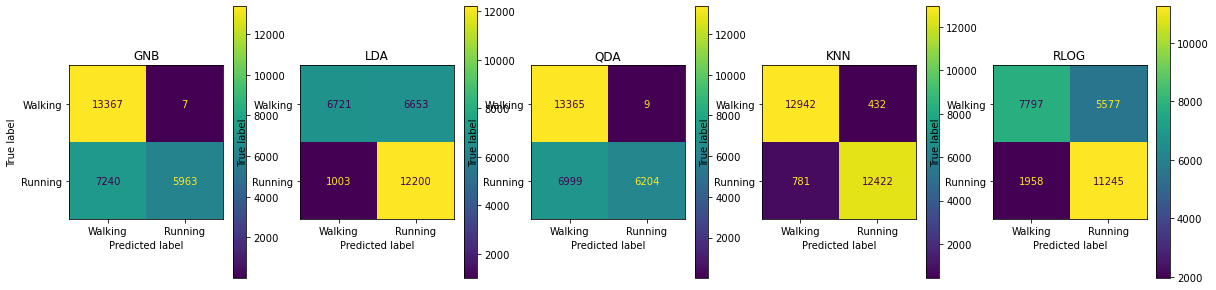

In [52]:
# 5. Plotando as matrizes de confusão
figure = plt.figure(figsize=(20, 5))

# enumarate ira fazer a contagem para i,
# retornar os nomes dos classificadores em clf_name e as matrizes de confusao em cm
for i, (clf_name, cm) in enumerate(cms.items()):
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Walking','Running'])
    ax = plt.subplot(1,5,i+1)
    disp.plot(ax=ax,values_format="d")
    ax.set_title(clf_name)

In [30]:
print('Acurácia:',round(accuracy_score(y_test, y_pred["GNB"]),4))
print(classification_report(y_test, y_pred["GNB"]))

print('Acurácia:',round(accuracy_score(y_test, y_pred["LDA"]),4))
print(classification_report(y_test, y_pred["LDA"]))

print('Acurácia:',round(accuracy_score(y_test, y_pred["QDA"]),4))
print(classification_report(y_test, y_pred["QDA"]))

print('Acurácia:',round(accuracy_score(y_test, y_pred["KNN"]),4))
print(classification_report(y_test, y_pred["KNN"]))

print('Acurácia:',round(accuracy_score(y_test, y_pred["RLOG"]),4))
print(classification_report(y_test, y_pred["RLOG"]))

Acurácia: 0.7273
              precision    recall  f1-score   support

           0       0.65      1.00      0.79     13374
           1       1.00      0.45      0.62     13203

    accuracy                           0.73     26577
   macro avg       0.82      0.73      0.70     26577
weighted avg       0.82      0.73      0.70     26577

Acurácia: 0.7119
              precision    recall  f1-score   support

           0       0.87      0.50      0.64     13374
           1       0.65      0.92      0.76     13203

    accuracy                           0.71     26577
   macro avg       0.76      0.71      0.70     26577
weighted avg       0.76      0.71      0.70     26577

Acurácia: 0.7363
              precision    recall  f1-score   support

           0       0.66      1.00      0.79     13374
           1       1.00      0.47      0.64     13203

    accuracy                           0.74     26577
   macro avg       0.83      0.73      0.72     26577
weighted avg       0.83

observando nossa matrix de confusão determinamos que o melhor classificador neste exercicio foi o KNN que teve uma acuracia enorme de 0.95 e precisão grande tambem 